## EDA 

Dataset is available from this link: https://archive.ics.uci.edu/ml/datasets/seeds
<br>
***From the website:***  <br>
**Abstract**: Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.
<br>
**Data Set Information:**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# adjusts style to emulate ggplot 
# a popular plotting package for R
plt.style.use('ggplot')
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [2]:
# read the dataset into a DataFrame
# used this to separate by tab space:
# https://stackoverflow.com/questions/32188243/what-does-t-represent-in-txt-file#:~:text=It%20is%20a%20tab%20character,sep%3D'%5Ct')
df = pd.read_csv('seeds_dataset.txt', header=None,  delim_whitespace=True)

In [3]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Attributes 


To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [4]:
# assign column names 
df.columns = ['Area', 'Perimeter', 'Compactness', 
              'Kernel Length', 'Kernel Width', 
              'Asymmetry Coefficient', 'Length Kernel Groove',
              'Species']

In [5]:
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Length Kernel Groove,Species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


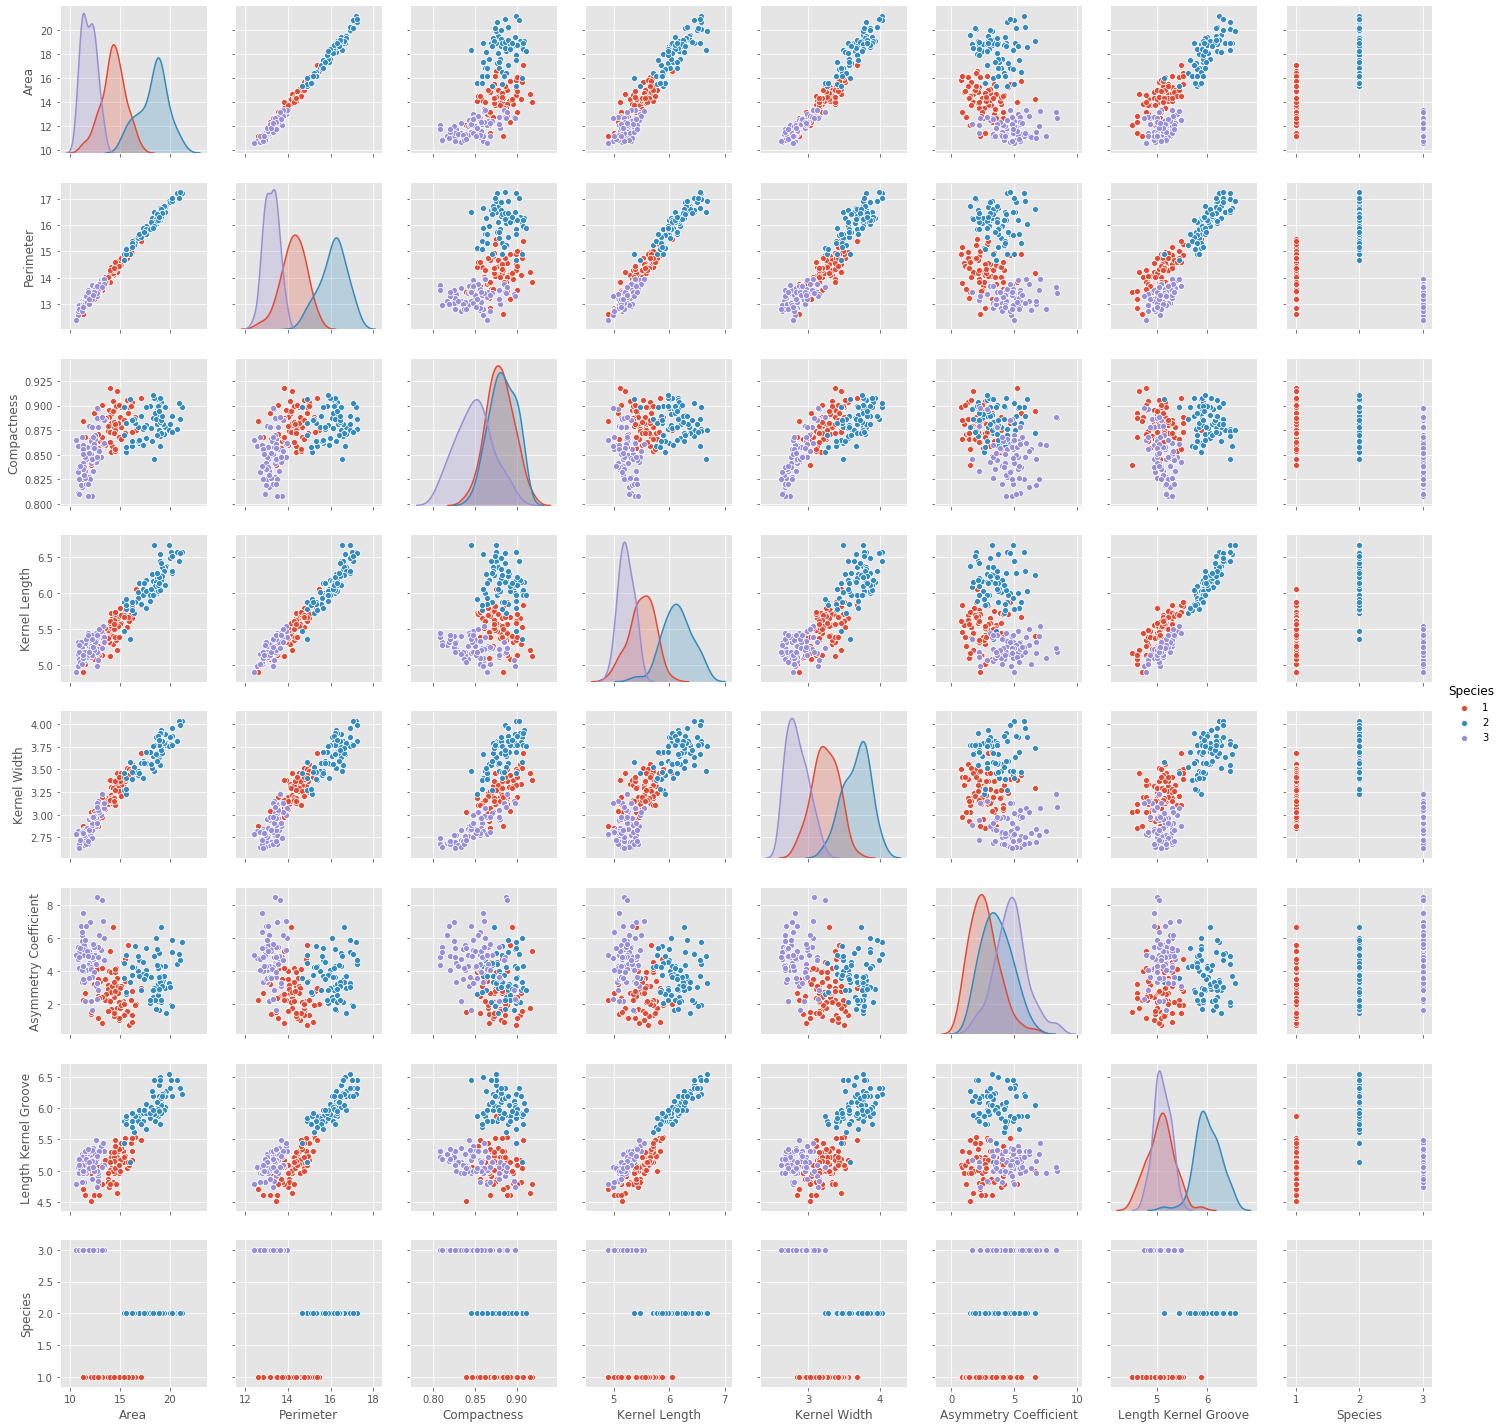

In [6]:
# create pairplots of all numeric factors in the dataset 
# hue is based on approval status 
sns.pairplot(df, hue="Species")

Based on the scatterplots and the fact that there are 3 species, I am guessing that we will have three clusters. 

## Clustering 

In [7]:
# create KMeans clustering model
# specify 3 clusters 
# because there are 3 iris species
model = KMeans(n_clusters=3)

In [20]:
# Create arrays for the features and the response variable 
y = df['Species'].values
X = df.drop(['Species'], axis=1).values

In [9]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [10]:
print(X)

[[15.26   14.84    0.871  ...  3.312   2.221   5.22  ]
 [14.88   14.57    0.8811 ...  3.333   1.018   4.956 ]
 [14.29   14.09    0.905  ...  3.337   2.699   4.825 ]
 ...
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [11.84   13.21    0.8521 ...  2.836   3.598   5.044 ]
 [12.3    13.34    0.8684 ...  2.974   5.637   5.063 ]]


In [11]:
# fit KMeans clustering model 
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# predict labels for clusters 
labels = model.predict(X)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]


## Cross Tabulation

In [13]:
# found this in Stack Overflow post: 
# https://stackoverflow.com/questions/9987483/elif-in-list-comprehension-conditionals
# b = ['F' if i > 0.5 else 'M' for i in a]
species = ['kama' if i == 1 else 'rosa' if i == 2 else 'canadian' for i in df['Species']]

In [14]:
print(species)

['kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'kama', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa', 'rosa',

## Aligning Labels and Species 

In [15]:
crosstab_df = pd.DataFrame({'labels': labels, 'species': species})
print(crosstab_df)

     labels   species
0         2      kama
1         2      kama
2         2      kama
3         2      kama
4         2      kama
..      ...       ...
205       0  canadian
206       0  canadian
207       0  canadian
208       0  canadian
209       0  canadian

[210 rows x 2 columns]


## Crosstab of Labels and Species 

In [16]:
ct = pd.crosstab(crosstab_df['labels'], crosstab_df['species'])
print(ct)

species  canadian  kama  rosa
labels                       
0              68     9     0
1               0     1    60
2               2    60    10


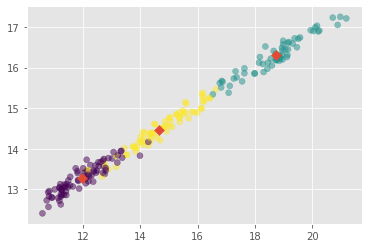

In [17]:
# Assign the columns of new_points: xs and ys
xs = X[:,0]
ys = X[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
# compute the coordinates of centroids 
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

The three species of grains separate well into three clusters. We can see that Label 3 very closely matches the Rosa species. Label 1 is mostly Canadian and Label 0 is mostly Kama. We can visualize the overlap between Species and Labels in the scatterplot above. <br>
How would we evaluate this clustering if there were no species labels? 

## Measuring clustering quality 
Using only samples and their cluster labels. 
+ A good clustering has tight clusters
+ Samples in each cluster are bunched together 

## Inertia Measures Clustering Quality 
+ Measures how spread out clusters are, lower is better
+ Distance from each sample to the centroid of its cluster
+ After fit(), available as attribute inertia_
+ k-means attempts to minimize inertia when choosing clusters

In [18]:
# lower inertia is better 
model = KMeans(n_clusters=3)
model.fit(X)
print(model.inertia_)

587.3186115940427


Inertia is the distance from each sample to the centroid of its cluster. Let's see if we can improve the inertia by choosing a different number of clusters. 

## The Number of Clusters

 + A good clustering has tight clusters, so low inertia. 
 + ... but not too many clusters
 + Choose an "elbow" in the inertia plot
 + Where inertia begins to decrease more slowly. 

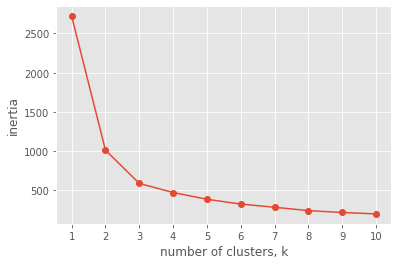

In [19]:
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Using the elbow method, 3 is a good choice for number of clusters for the grain dataset. 